In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import time
import matplotlib
from torch.utils.data import DataLoader
import torch.utils.data as data
import numpy as np
import pandas as pd
from torchvision.datasets import ImageFolder
from torchvision import transforms

import cv2

In [2]:
import sys,os
sys.path.append(os.pardir)

import py_func.Deep_learning_torch_func as DL
import py_func.models_func as my_model
import py_func.dat_rb_func as drb

In [3]:
from torchinfo import summary

In [30]:
simpath = '../dat/experiment/SLM/mean/m_1_23000_fps2_N10_lsd_mean.dat'
binpath = '../dat/bindat/1byte/m_28_1.dat'
x = 28
y = 28

#復元
#28000を訓練、1000を評価、1000をテスト,テストは後で使う
m_dc_set_t,m_dc_set_v=DL.mysimbin_to_dataset_ver2(simpath, binpath, 1600, x, y, 23000, 1, 1, True, 22000,  normalize_true = True, label_img_norm_true = True)
m_dc_loader_t=DataLoader(m_dc_set_t,batch_size=64,shuffle=True)
m_dc_loader_v=DataLoader(m_dc_set_v,batch_size=64,shuffle=True)

In [31]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [6,4,4,4,4,4]
stride_list = [1,1,1,1,1,1]
padding_list = [4,4,2,2,2,2]
outpadding_list = [0,0,0,0,0,0]
in_channel_list = [1,64,128,256,128,64]
out_channel_list = [64,128,256,128,64,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [32]:
summary(model = model, input_size = (64, 1, 1600))

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [64, 1, 1600]             2,561,600
├─ReLU: 1-2                                   [64, 1, 1600]             --
├─Sequential: 1-3                             [64, 1, 28, 28]           --
│    └─Convtp_Bn_ReLu: 2-1                    [64, 64, 37, 37]          --
│    │    └─Sequential: 3-1                   [64, 64, 37, 37]          2,496
│    └─Convtp_Bn_ReLu: 2-2                    [64, 128, 32, 32]         --
│    │    └─Sequential: 3-2                   [64, 128, 32, 32]         131,456
│    └─Convtp_Bn_ReLu: 2-3                    [64, 256, 31, 31]         --
│    │    └─Sequential: 3-3                   [64, 256, 31, 31]         525,056
│    └─Convtp_Bn_ReLu: 2-4                    [64, 128, 30, 30]         --
│    │    └─Sequential: 3-4                   [64, 128, 30, 30]         524

In [33]:
device

device(type='cuda', index=0)

エポック1--------------------------------
epochtime:0.7049259106318156分, train_loss:0.0008201784686270085, val_loss:0.0008113079033792019
エポック2--------------------------------
epochtime:0.7070405999819438分, train_loss:0.0006715649791400541, val_loss:0.000694993145763874
エポック3--------------------------------
epochtime:0.7038112123807271分, train_loss:0.0005946273537860675, val_loss:0.0006312642954289914
エポック4--------------------------------
epochtime:0.710099458694458分, train_loss:0.0005441063286905939, val_loss:0.0006030653268098832
エポック5--------------------------------
epochtime:0.7018767555554708分, train_loss:0.0004979790259491314, val_loss:0.000560978164896369
エポック6--------------------------------
epochtime:0.7079743464787801分, train_loss:0.00046796804497187787, val_loss:0.0005595897696912288
エポック7--------------------------------
epochtime:0.7080484310785929分, train_loss:0.00044403691581365736, val_loss:0.0005513358097523451
エポック8--------------------------------
epochtime:0.7041061441103

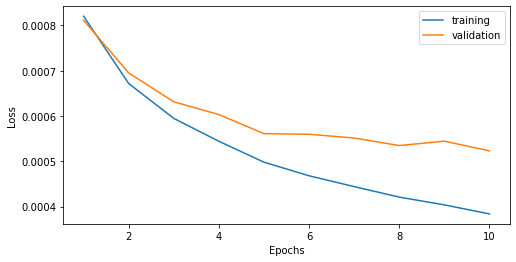

In [34]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)

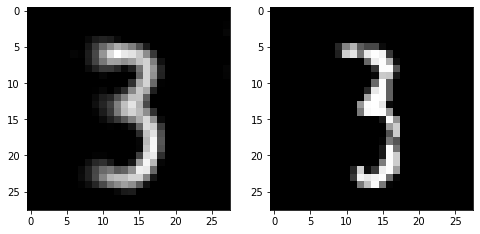

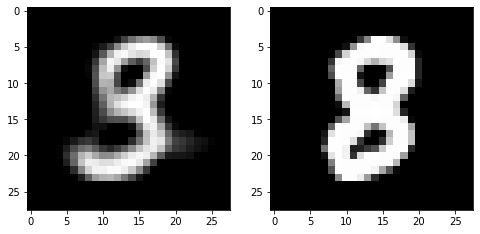

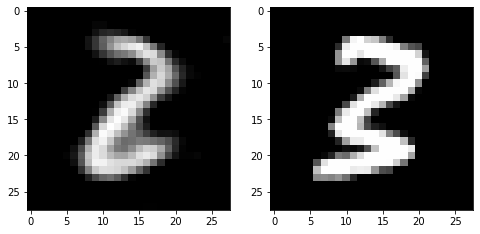

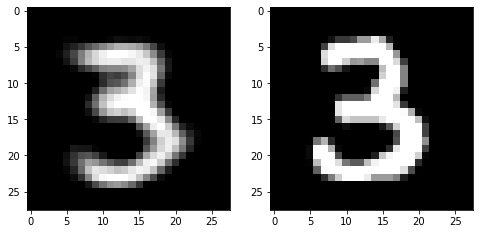

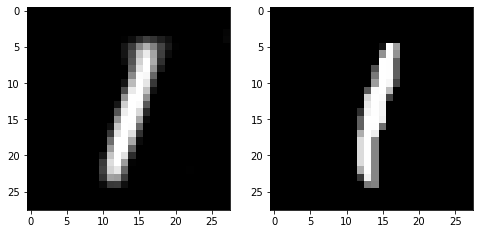

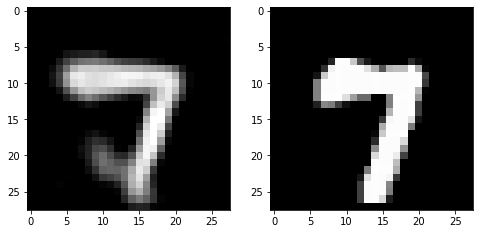

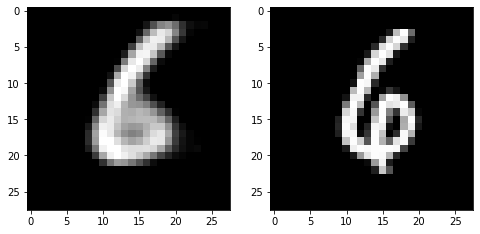

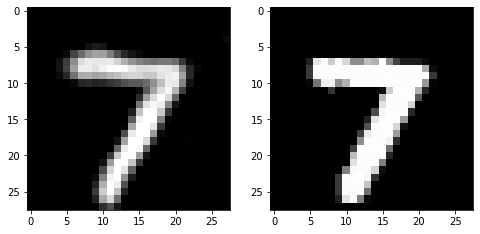

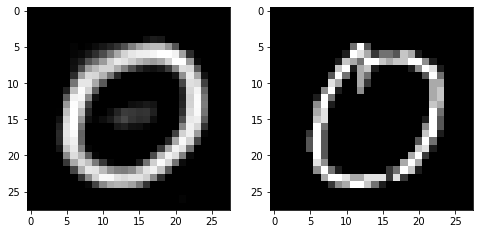

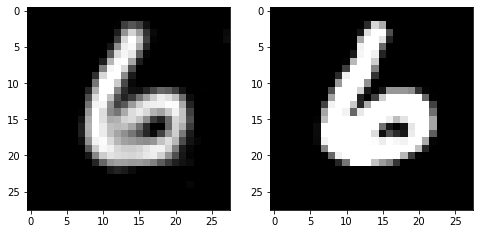

[19.241411982216494,
 14.43174748250884,
 14.387304785085142,
 15.089400380115006,
 19.983818553097727,
 16.46266014802462,
 14.752481414120926,
 17.38324541554168,
 13.946685056447134,
 16.98471078473306,
 14.332385742886691,
 17.910414527804388,
 17.96960396062566,
 16.036422902302878,
 16.150151382104234,
 12.57894883179651,
 16.21146604346779,
 15.432214864675702,
 16.809452864466703,
 13.9716292092084,
 12.44430769569041,
 12.650146561766615,
 19.000109213465123,
 14.921901967656424,
 15.223191246668037,
 19.361537226602945,
 15.464182632146494,
 14.422782387399796,
 13.875521706158118,
 13.865535394718798,
 15.410841506464925,
 15.321403915932471,
 14.429894863719158,
 12.895654857564063,
 14.510462760539347,
 15.3432296976764,
 15.296778755255305,
 14.896398806160875,
 15.474489380612084,
 13.237833566981625,
 14.970037883183561,
 15.269777708322351,
 15.763053913521867,
 13.616464021498247,
 13.20118210997461,
 20.660809884179,
 13.153947218448693,
 12.941426065687436,
 18.8847

In [35]:
#23000枚
simpath = '../dat/experiment/SLM/mean/m_1_23000_fps2_N10_lsd_mean.dat'
binpath = '../dat/bindat/1byte/m_28_1.dat'


t_t, t_v = DL.mysimbin_to_dataset_ver2(simpath, binpath, 1600, 28, 28, 23000, 1, 1, True, 22000,  normalize_true = True, label_img_norm_true = True)
del t_t
tl = DataLoader(t_v, batch_size = 64, shuffle = False)
psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)
psnrs

エポック1--------------------------------
epochtime:0.8887298742930094分, train_loss:0.0008296221277809568, val_loss:0.001027752835303545
エポック2--------------------------------
epochtime:0.8945542772610983分, train_loss:0.0007043237651565245, val_loss:0.0009001879170536995
エポック3--------------------------------
epochtime:0.8963588118553162分, train_loss:0.0006123087785339782, val_loss:0.0008097800724208355
エポック4--------------------------------
epochtime:0.8936305999755859分, train_loss:0.0005583254196681082, val_loss:0.0007979692965745926
エポック5--------------------------------
epochtime:0.8960022886594137分, train_loss:0.0005305291486770979, val_loss:0.0007620275169610977
エポック6--------------------------------
epochtime:0.8978715300559997分, train_loss:0.00048360013935182776, val_loss:0.0007445060387253761
エポック7--------------------------------
epochtime:0.9044531345367431分, train_loss:0.0004586709192954004, val_loss:0.0007200732864439487
エポック8--------------------------------
epochtime:0.894508739312

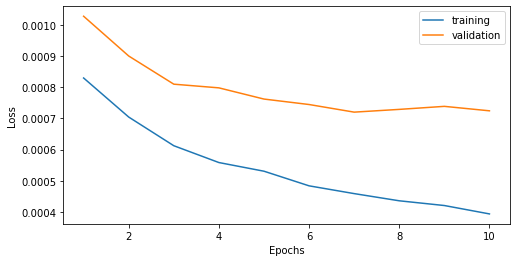

In [29]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)


エポック1--------------------------------
epochtime:0.8895146965980529分, train_loss:0.0009952506537416151, val_loss:0.0011701269671320915
エポック2--------------------------------
epochtime:0.8871969262758891分, train_loss:0.000777483173912125, val_loss:0.0009485017284750939
エポック3--------------------------------
epochtime:0.8878645300865173分, train_loss:0.0007018466823335205, val_loss:0.0009011638723313808
エポック4--------------------------------
epochtime:0.8885033329327902分, train_loss:0.0006483536516981466, val_loss:0.0008200403042137623
エポック5--------------------------------
epochtime:0.8887741128603618分, train_loss:0.0006075267774452056, val_loss:0.00081429223716259
エポック6--------------------------------
epochtime:0.8891225973765056分, train_loss:0.0005744768035864192, val_loss:0.0008034284375607968
エポック7--------------------------------
epochtime:0.8887401819229126分, train_loss:0.0005476602480879852, val_loss:0.0007845781333744526
エポック8--------------------------------
epochtime:0.888840162754058

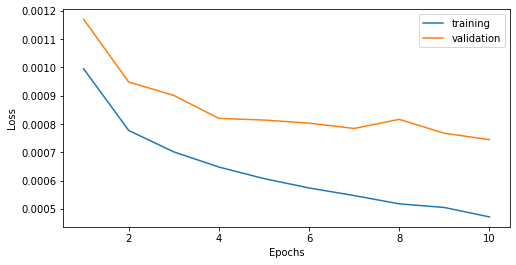

In [23]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)


エポック1--------------------------------
epochtime:0.8847806215286255分, train_loss:0.0010205103510192463, val_loss:0.0011648180037736892
エポック2--------------------------------
epochtime:0.8856470028559367分, train_loss:0.0009037545222256865, val_loss:0.001079678162932396
エポック3--------------------------------
epochtime:0.8837045550346374分, train_loss:0.0008044965945716415, val_loss:0.0009991755448281764
エポック4--------------------------------
epochtime:0.883954393863678分, train_loss:0.0007303528278799993, val_loss:0.0009526695124804973
エポック5--------------------------------
epochtime:0.885815175374349分, train_loss:0.0006897963720506855, val_loss:0.0009395941793918609
エポック6--------------------------------
epochtime:0.886197296778361分, train_loss:0.0006404116640665702, val_loss:0.0008588550016283989
エポック7--------------------------------
epochtime:0.8858774900436401分, train_loss:0.0006504060491653426, val_loss:0.0008913118429481983
エポック8--------------------------------
epochtime:0.892732294400533分

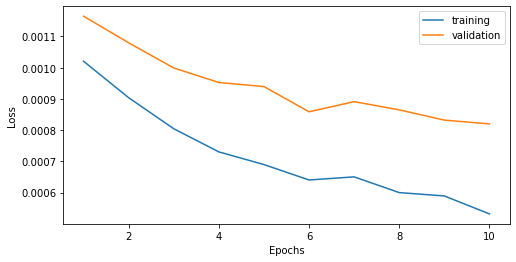

In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.1)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)




In [18]:
md_path = '../torchpth/expe/decode/m28000_lsd_out28_dec_e30_b64_lr0.1_adam_norm.pth'
torch.save(model.state_dict(), md_path)

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [6,4,4,4,4,4]
stride_list = [1,1,1,1,1,1]
padding_list = [4,4,2,2,2,2]
outpadding_list = [0,0,0,0,0,0]
in_channel_list = [1,64,128,256,128,64]
out_channel_list = [64,128,256,128,64,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [5]:
md_path = '../torchpth/expe/decode/m28000_lsd_out28_dec_e30_b64_lr0.1_adam_norm.pth'
model.load_state_dict(torch.load(md_path))

<All keys matched successfully>

In [14]:
simpath = '../dat/experiment/SLM/mean/m_1_30000_fps2_N10_lsd_mean.dat'
binpath = '../dat/bindat/1byte/m_28_1.dat'


t_t, t_v = DL.mysimbin_to_dataset_ver2(simpath, binpath, 1600, 28, 28, 30000, 1, 1, True, 29000,  normalize_true = True, label_img_norm_true = False)
del t_t
tl = DataLoader(t_v, batch_size = 64, shuffle = False)



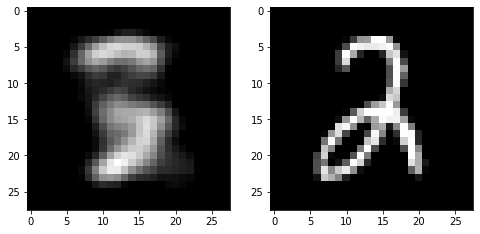

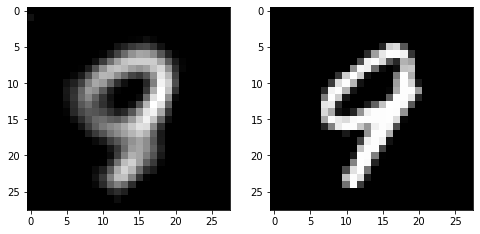

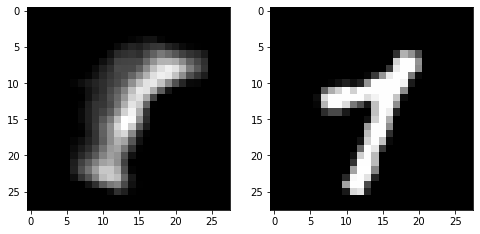

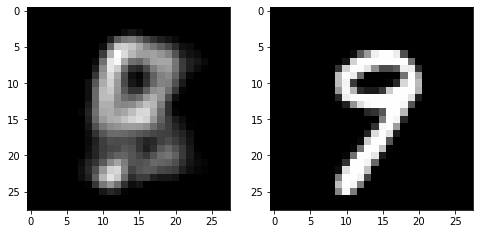

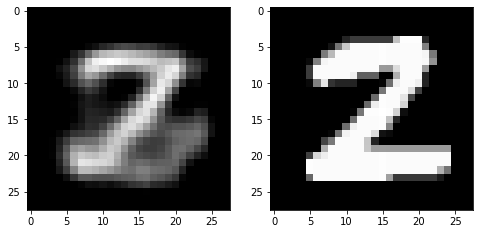

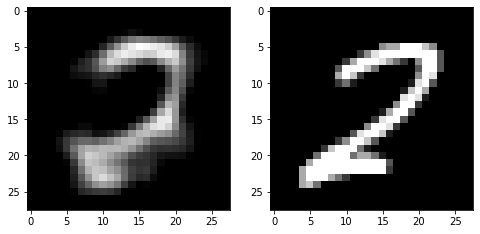

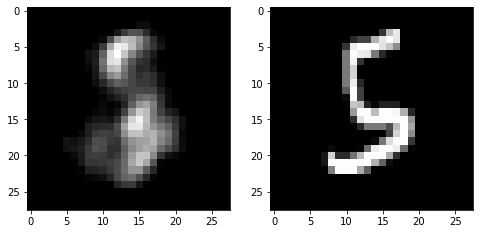

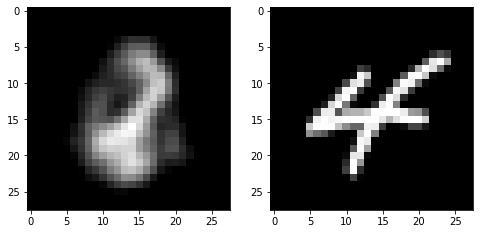

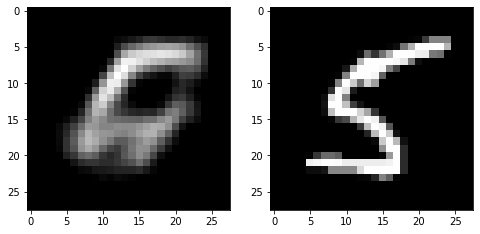

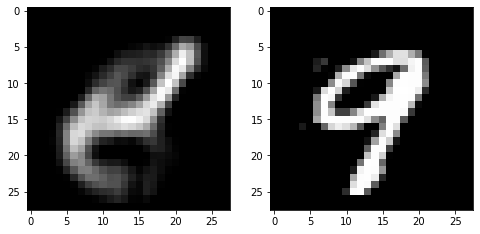

[12.554629973181344,
 15.113261297062373,
 13.405457335218426,
 13.414451887753327,
 11.409710705585832,
 12.181618089901537,
 14.191825333663948,
 12.010809797411275,
 12.63733287058452,
 11.562719023942998,
 15.788675967153967,
 11.6295888977775,
 15.113817121792527,
 11.713833375729536,
 10.235538777492925,
 11.730346944045259,
 12.116295844346702,
 10.59278513818284,
 13.992797667882716,
 10.715600561939238,
 13.398738996078412,
 13.937653886664918,
 9.51614989336738,
 11.677929647261983,
 14.727877858327211,
 12.998646299504585,
 11.342528338195253,
 12.681561258307166,
 15.663780230981725,
 11.55608271139016,
 14.331616555355415,
 12.514913515631122,
 12.905973694331063,
 16.60688651345476,
 15.003151711444128,
 10.679462930272166,
 13.310226105365219,
 11.706072602096542,
 12.536737967734853,
 13.449401505173297,
 18.23826966381147,
 15.348819363127395,
 13.573227396413097,
 13.2172170481837,
 13.396200183178328,
 13.245701131635329,
 14.007250439800067,
 14.013318491138074,
 9.

In [9]:
#30000枚
psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)
psnrs

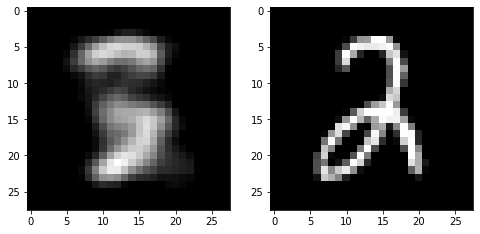

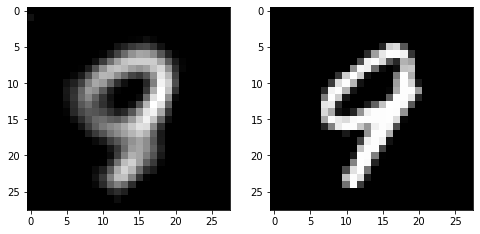

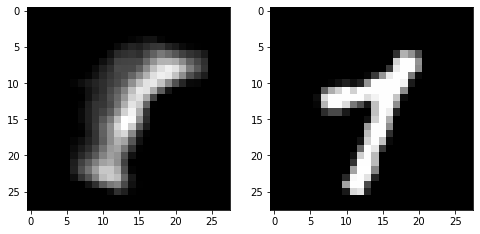

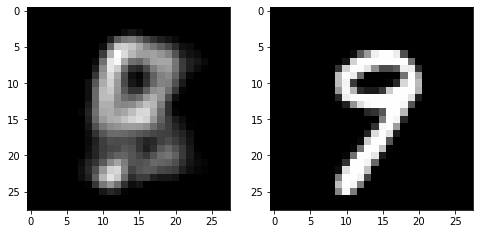

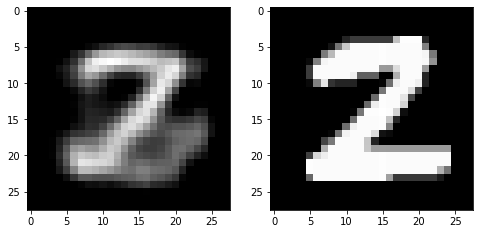

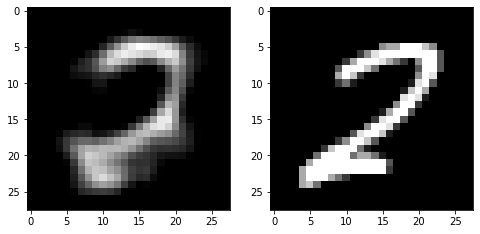

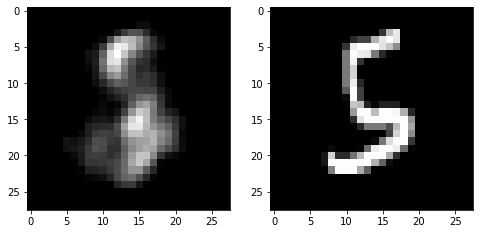

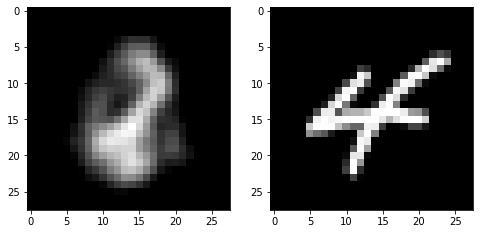

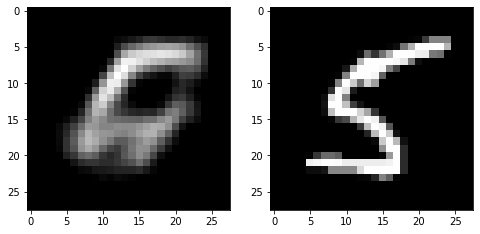

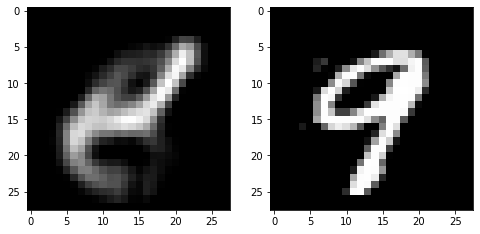

[12.554629973181344,
 15.113261297062373,
 13.405457335218426,
 13.414451887753327,
 11.409710705585832,
 12.181618089901537,
 14.191825333663948,
 12.010809797411275,
 12.63733287058452,
 11.562719023942998,
 15.788675967153967,
 11.6295888977775,
 15.113817121792527,
 11.713833375729536,
 10.235538777492925,
 11.730346944045259,
 12.116295844346702,
 10.59278513818284,
 13.992797667882716,
 10.715600561939238,
 13.398738996078412,
 13.937653886664918,
 9.51614989336738,
 11.677929647261983,
 14.727877858327211,
 12.998646299504585,
 11.342528338195253,
 12.681561258307166,
 15.663780230981725,
 11.55608271139016,
 14.331616555355415,
 12.514913515631122,
 12.905973694331063,
 16.60688651345476,
 15.003151711444128,
 10.679462930272166,
 13.310226105365219,
 11.706072602096542,
 12.536737967734853,
 13.449401505173297,
 18.23826966381147,
 15.348819363127395,
 13.573227396413097,
 13.2172170481837,
 13.396200183178328,
 13.245701131635329,
 14.007250439800067,
 14.013318491138074,
 9.

In [15]:
psnrs2 = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = False)
psnrs2

In [10]:
len(psnrs)

1000

In [11]:
psnrs = np.array(psnrs)

In [12]:
psnr = np.mean(psnrs)

In [13]:
psnr

12.709320909824852

In [16]:
psnrs2 = np.array(psnrs2)

In [18]:
np.all(psnrs == psnrs2)

True